In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

### Первичный анализ

In [179]:
data = pd.read_csv('data/Kobe.csv')
type(data)

pandas.core.frame.DataFrame

In [180]:
# посмотрим на первые 10 строк DataFrame
data.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [181]:
# посмотрим, какие имеются поля и какие в них типы данных.
# нет пропущенных значений, кроме shot_made_flag (создатели csv файла удалили 5000 значений "попадание")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [182]:
# вот так выглядят пропущенные значения 'shot_made_flag'
data[['shot_made_flag', 'action_type']].head(3)

,shot_made_flag,action_type
0,NaN,Jump Shot
1,0.0,Jump Shot
2,1.0,Jump Shot


In [183]:
# посмотрим колонки
print(data.columns)
print('Всего полей: ' ,len(data.columns))

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')
Всего полей:  25


In [184]:
# посмотрим основные статистики
data.describe(percentiles = [0.25, 0.5, 0.75, 0.68])

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
68%,331.000000,2.120109e+07,34.026300,58.000000,138.000000,-118.211800,7.000000,3.000000,0.000000,39.000000,19.000000,1.000000,1.610613e+09,20874.280000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [185]:
# первый вопрос, который возникает: как часто Коби попадает? В самом простом случае можно вычислить процент попаданий и 
# на основе этой вероятности делать предсказания.
# найдем список id бросков, по которым неизвестен результат
missing_result_id = data[['shot_made_flag']][(data['shot_made_flag'] != 1) & (data['shot_made_flag'] != 0)].reset_index()
missing_result_id = missing_result_id['index'].tolist()
missing_result_id[:10] # первые 10 из 5000

[0, 7, 16, 19, 32, 33, 34, 35, 36, 37]

In [186]:
# отфильтруем только те строки, где известно значение 'shot_made_flag'
data[~data.shot_id.isin(missing_result_id)].head(3)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3


In [187]:
# еще раз убедимся, что кроме пропусков, нулей и единиц друггих значений нет, иначе это повлияет на расчет
data['shot_made_flag'].unique()

array([nan,  0.,  1.])

In [188]:
# всего зачитано попаданий
# data['shot_made_flag'].sum()
np.sum(data['shot_made_flag']) 

11465.0

In [189]:
# считаем процент попаданий
np.sum(data['shot_made_flag']) / len(data[~data.shot_id.isin(missing_result_id)]) * 100

44.61436687679975

In [190]:
# в более чем 44 случаях из ста Коби попадал. А в среднем за игру сколько он забивал?
# len(list(data['game_id'].unique())) # количество игр за 20 лет
np.sum(data['shot_made_flag']) / len(list(data['game_id'].unique()))

7.354073123797306

In [191]:
# посмотрим, сколько мячей из каких частей поля Коби забивал (используем пока только одну метрику 'shot_zone_area')
data[data['shot_made_flag'] == 1]['shot_zone_area'].value_counts()

Center(C)                5933
Right Side(R)            1550
Right Side Center(RC)    1523
Left Side(L)             1243
Left Side Center(LC)     1215
Back Court(BC)              1
Name: shot_zone_area, dtype: int64

In [192]:
# видно, что чаще всего он бросал из центра и при этом чаще попадал, чем промахивался
data_grouped = data[
    ['shot_id', 'shot_made_flag', 'shot_zone_area']
].groupby(['shot_zone_area', 'shot_made_flag']).agg(['count'])
data_grouped


shot_id
                                       count
shot_zone_area        shot_made_flag        
Back Court(BC)        0.0                 71
                      1.0                  1
Center(C)             0.0               5356
                      1.0               5933
Left Side Center(LC)  0.0               2149
                      1.0               1215
Left Side(L)          0.0               1889
                      1.0               1243
Right Side Center(RC) 0.0               2458
                      1.0               1523
Right Side(R)         0.0               2309
                      1.0               1550

In [193]:
# визуализируем это
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
# будем работать с датафреймом nona - без пропущенных значений
nona =  data[pd.notnull(data['shot_made_flag'])]
nona.shape

(25697, 25)

Text(0.5,1,'lat and lon')

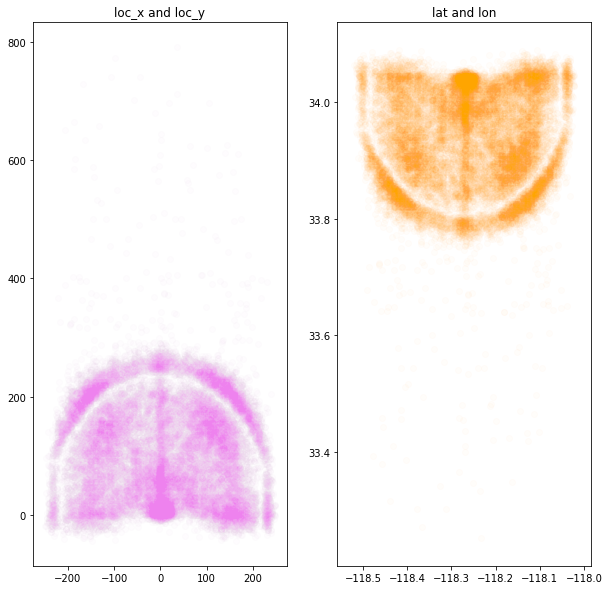

In [194]:
# построим две визуализации - по координатам (lat и lon) и по координатам oc_x, loc_y
# увидим, откуда чаще всего делал броски Коби
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(nona.loc_x, nona.loc_y, color='violet', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(nona.lon, nona.lat, color='orange', alpha=alpha)
plt.title('lat and lon')

##### Проверим, какие переменные нам нужны, а от каких можно избавиться

loc_x, loc_y, lat и lon похожи по названиям на location_x, location_y, latitude и longitude

Выше уже построили визуализацию по ним

minutes_remaining и seconds_remaining можно объединить в одно поле

In [195]:
# remaining_time будет отражать кол-во минут как целое значение и десятичная дробь
data['remaining_time'] = data['minutes_remaining']  + data['seconds_remaining']/60
data[['minutes_remaining' , 'seconds_remaining', 'remaining_time']].head(3)

,minutes_remaining,seconds_remaining,remaining_time
0,10,27,10.450000
1,10,22,10.366667
2,7,45,7.750000


action_type, combined_shot_type, shot_type - типы броска

In [196]:
# их довольно много 
print(nona.action_type.unique())
print(nona.combined_shot_type.unique())
print(nona.shot_type.unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

Сезоны Season

In [197]:
nona['season'].unique() # значение составлено из двух частей: год начала и год окончания

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [198]:
# возьмем для анализа год окончания, так будем обозначать сезон
data['season'] = data['season'].apply(lambda x: int(x.split('-')[1]) )
data['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

opponent , matchup - одно и то же

In [199]:
pd.DataFrame({'matchup':nona.matchup, 'opponent':nona.opponent}).head() # matchup можно не использовать

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR


shot_zone_area, shot_zone_basic, shot_zone_range

In [200]:
# имеем довольно много вариантов по трем видам метрик расстояния броска
print(nona.shot_zone_area.unique())
print(nona.shot_zone_basic.unique())
print(nona.shot_zone_range.unique())

['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


In [201]:
# эти метрики означают часть поля. Визуализируем

Text(0.5,1,'shot_zone_range')

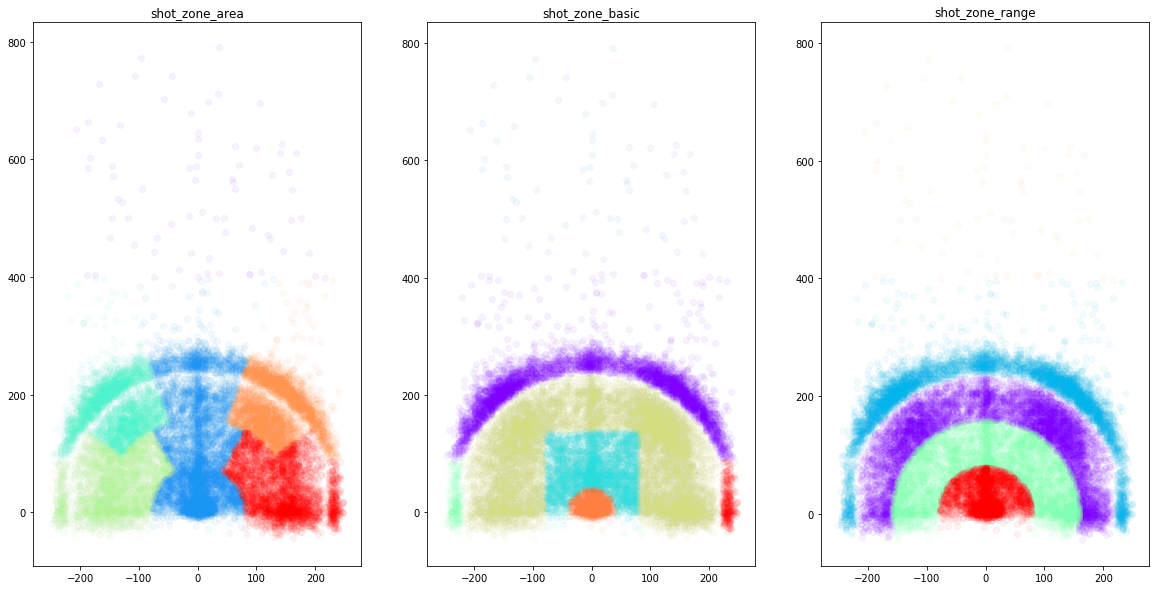

In [202]:
import matplotlib.cm as cm
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    """функция принимает название поля и строит скатерплот
    """
    alpha = 0.05 # The alpha blending value, between 0 (transparent) and 1 (opaque)
    gs = nona.groupby(feat) # группировка по значениям поля, например 'Left Side(L)'
    cs = cm.rainbow(np.linspace(0, 1, len(gs))) # цвета
    for g, c in zip(gs, cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

In [203]:
# можно заменить каегориальные значения числовыми
# примерно можно по разметке площадки на глаз оценить расстояния в футах по каждой категории
# сделано только как пример без претензий на точность метода
# потренируемся на копии
data2 = pd.read_csv('data/Kobe.csv')

In [204]:
def process_shot_zone_range(distance):
    if distance == '16-24 ft.':
        return 20
    elif distance == 'Less Than 8 ft.':
        return 4
    elif distance == '24+ ft.':
        return 30
    elif distance == '8-16 ft.':
        return 12
    elif distance == 'Back Court Shot':
        return 8

In [205]:
def process_shot_zone_basic(zone):
    if zone == 'Mid-Range':
        return 40
    elif zone == 'Restricted Area':
        return 94
    elif zone == 'Above the Break 3':
        return 25
    elif zone == 'In The Paint (Non-RA)':
        return 23
    elif zone == 'Right Corner 3':
        return 12
    elif zone == 'Left Corner 3':
        return 12
    elif zone == 'Backcourt':
        return 7

In [206]:
def process_shot_zone_area(area):
    if area == 'Left Side(L)':
        return 10
    elif area == 'Left Side Center(LC)':
        return 16
    elif area == 'Right Side Center(RC)':
        return 16
    elif area == 'Center(C)':
        return 20
    elif area == 'Right Side(R)':
        return 10
    elif area == 'Back Court(BC)':
        return 8
    

In [207]:
data2.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [208]:
# сделаем датафрейм с признаками shot_zone_range, shot_zone_basic и shot_zone_area, 
# которые мы перевели из категориальных в числовые
data2['shot_zone_range'] = data2.apply(lambda row: process_shot_zone_range(row.shot_zone_range), axis=1)
data2['shot_zone_basic'] = data2.apply(lambda row: process_shot_zone_basic(row.shot_zone_basic), axis=1)
data2['shot_zone_area'] = data2.apply(lambda row: process_shot_zone_area(row.shot_zone_area), axis=1)

data2[['shot_zone_range', 'shot_zone_basic', 'shot_zone_area']].head()

,shot_zone_range,shot_zone_basic,shot_zone_area
0,20,40,10
1,12,40,10
2,20,40,16
3,20,40,16
4,4,94,20


##### Обработаем категориальные переменные

In [209]:
# какие вообще переменные у нас есть
list(data.columns)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id',
 'remaining_time']

In [210]:
print('Всего полей в исходном датафрейме: ', len(data.columns))

Всего полей в исходном датафрейме:  26


In [211]:
# примем решение по каждой переменной
#'action_type', - категориальная, оставляем и заэнкодим
# 'combined_shot_type', - категориальная, оставляем и заэнкодим
# 'game_event_id', - числовая, удаляем
# 'game_id', - числовая, оставляем
# 'lat', - числовая, удаляем, т.к. такая точность не нужна, будем использовать  'shot_zone_area','shot_zone_basic', 'shot_zone_range'
# 'loc_x', - числовая, удаляем, т.к. такая точность не нужна, будем использовать  'shot_zone_area','shot_zone_basic', 'shot_zone_range'
# 'loc_y', - числовая, удаляем, т.к. такая точность не нужна, будем использовать  'shot_zone_area','shot_zone_basic', 'shot_zone_range'
# 'lon', - числовая, удаляем, т.к. такая точность не нужна, будем использовать  'shot_zone_area','shot_zone_basic', 'shot_zone_range'
# 'minutes_remaining', - числовая, убираем, входит в 'remaining_time'
# 'period', - числовая, оставляем
# 'playoffs', - числовая, оставляем
# 'season', - числовая, оставляем, уже обработана
# 'seconds_remaining', - числовая, убираем, входит в 'remaining_time'
# 'shot_distance', - числовая, оставляем
# 'shot_made_flag', - числовая, пока оставляем
# 'shot_type', - категориальная, оставляем и заэнкодим
# 'shot_zone_area', - категориальная, оставляем и заэнкодим
# 'shot_zone_basic', - категориальная, оставляем и заэнкодим
# 'shot_zone_range', - категориальная, оставляем и заэнкодим
# 'team_id', - числовая, не нужна (одна команда)
# 'team_name', - категориальная, не нужна (одна команда)
# 'game_date', - категориальная, не нужна (учитываем сезоны)
# 'matchup', - категориальная, не нужна (то же, что и 'opponent')
# 'opponent', - категориальная, оставляем и заэнкодим
# 'shot_id', - числовая, оставляем
# 'remaining_time' - числовая, оставляем, посчитана нами из двух полей 'seconds_remaining' и 'minutes_remaining'

In [282]:
def get_one_hot(df, cols): 
    """
    Функция берет обычный pd Data Frame, его колонки, которые надо заэнкодить
    как правило это названия колонок с категориальными данными.
    Возвращает датафрейм, в котором все колонки заэнкожены
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False) # подаем датафрейм (df[each]) и говорим, что к каждой категории добавится еще название исходной переменной (prefix=each)
        df = pd.concat([df, dummies], axis=1)#                              drop_first=False - не выкидывать первую исходную колонку
    return df

In [283]:
cols_list = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']
one_hot_df = get_one_hot(data, cols_list)
one_hot_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,0,0,1,0,0,0,0,0,0,0
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0,0,1,0,0,0,0,0,0,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,0,0,1,0,0,0,0,0,0,0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0,0,1,0,0,0,0,0,0,0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,0,0,1,0,0,0,0,0,0,0


In [284]:
list(one_hot_df.columns)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id',
 'remaining_time',
 'action_type_Alley Oop Dunk Shot',
 'action_type_Alley Oop Layup shot',
 'action_type_Cutting Finger Roll Layup Shot',
 'action_type_Cutting Layup Shot',
 'action_type_Driving Bank shot',
 'action_type_Driving Dunk Shot',
 'action_type_Driving Finger Roll Layup Shot',
 'action_type_Driving Finger Roll Shot',
 'action_type_Driving Floating Bank Jump Shot',
 'action_type_Driving Floating Jump Shot',
 'action_type_Driving Hook Shot',
 'action_type_Driving Jump shot',
 'action_type_Driving Layup Shot',
 'action_type_Driving Reverse Layup Shot',
 'action_type_Driving Slam Dunk Shot',
 'action_type_Dunk Shot

In [285]:
one_hot_df.shape

(30697, 142)

In [216]:
#почему 142 колонки?
#Мы помним, что в исходном датафрейме было 26
len(data.columns)

26

In [286]:
# посчитаем, сколько новых метрик должно появиться
enc_cols = 0
for i in range(len(cols_list)):
    enc_cols += len(data[cols_list[i]].unique())
enc_cols

116

In [218]:
# все сходится!
len(data.columns) + enc_cols

142

##### Удаляем ненужные переменные

In [287]:
drops = ['game_event_id', 'lat', 'lon','loc_x', 'loc_y','minutes_remaining', 'seconds_remaining', \
         'team_id',  'team_name','game_date', 'matchup', 'action_type', 'combined_shot_type', \
        'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']
for drop in drops:
    one_hot_df = one_hot_df.drop(drop, 1)

In [288]:
print('Колонок: ', len(one_hot_df.columns))

Колонок:  124


In [289]:
# проверим, что понимаем, откуда такое кол-во
len(data.columns) + enc_cols - len(drops) == len(one_hot_df.columns)

True

In [290]:
one_hot_df_train = one_hot_df[(one_hot_df['shot_made_flag'] == 1) | (one_hot_df['shot_made_flag'] == 0)]
one_hot_df_test = one_hot_df[(one_hot_df['shot_made_flag'] != 1) & (one_hot_df['shot_made_flag'] != 0)]

In [302]:
x_train = one_hot_df_train
y_train = one_hot_df_train['shot_made_flag']
x_test = one_hot_df_test
y_test = one_hot_df_test['shot_made_flag'].fillna(0.5)

### Строим модель

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [293]:
import os

In [294]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [295]:
import xgboost
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=1)
#xgb = DecisionTreeClassifier()

xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]



In [319]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
#roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
#print("Test: ", roc_auc_test)

Train:  1.0


In [ ]:
# почему не хочет считать roc_auc_test

In [312]:
type(y_test[7])

numpy.float64

In [313]:
type(y_train[6])

numpy.float64

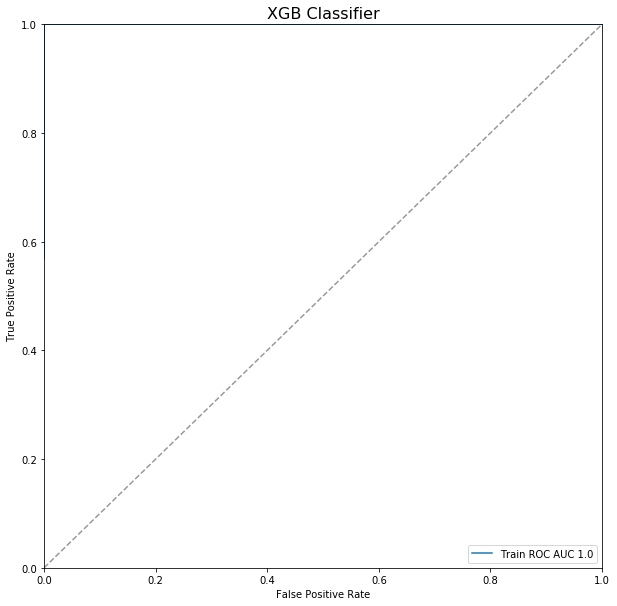

In [323]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
#fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
#plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

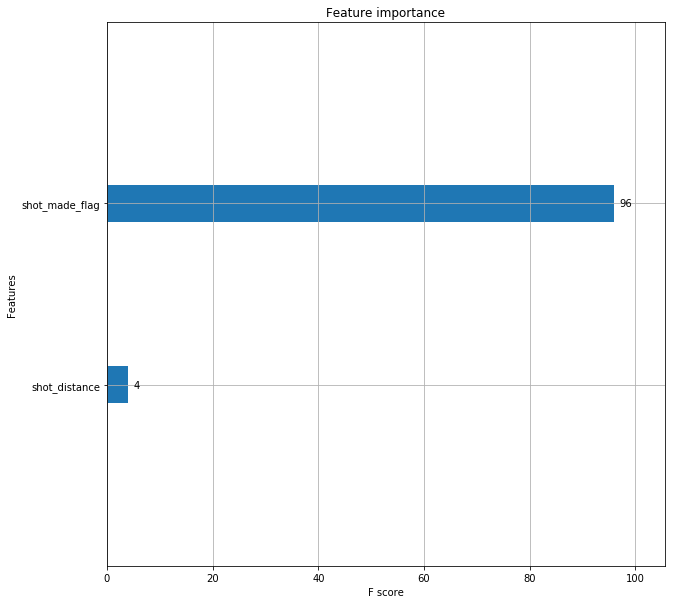

In [324]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 10)
xgboost.plot_importance(booster=xgb)
plt.savefig('tree_importance_test1.png')

### Использование линейной регрессии

In [356]:
x_test.shape

(5000, 124)

In [357]:
# берем из библиотеки sklearn логистисекую регрессию
from sklearn.linear_model import LogisticRegression

In [359]:
clf = LogisticRegression()
X_train = one_hot_df.dropna().drop(['shot_made_flag'], axis=1) # dropna() нужна, чтобы не скармливать регрессии пустые значения
y_train = one_hot_df.dropna()['shot_made_flag']

In [360]:
clf.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [361]:
from sklearn.metrics import roc_auc_score, roc_curve

In [362]:
y_train_predict = clf.predict_proba(X_train)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.51


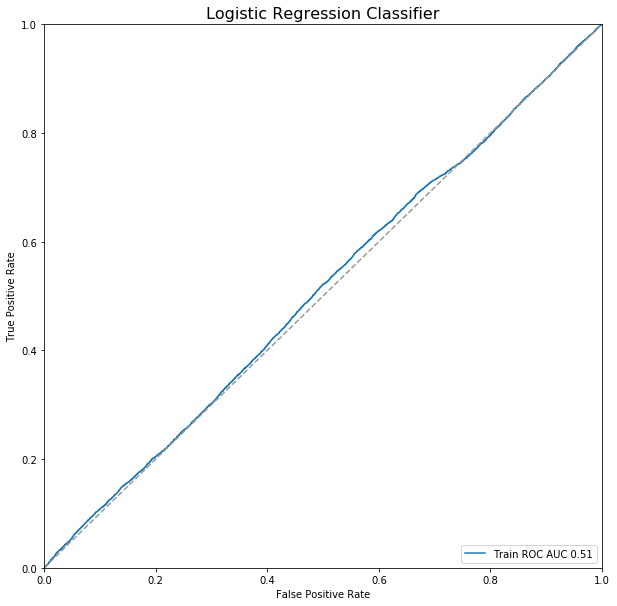

In [363]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [364]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [365]:
# По использованию Лассо и ридж нужны пояснения

#### Построение модели при помощи randomForest classifier

In [327]:
df = one_hot_df[pd.notnull(one_hot_df['shot_made_flag'])] # получаем датафрейм без пропущенных значений и с нашими новыми фичами. Это тренировочный датафрейм
submission = one_hot_df[pd.isnull(one_hot_df['shot_made_flag'])] # получаем датафрейм из 5000 строк, по которым автор данных удалил shot_made_flag
submission = submission.drop('shot_made_flag', 1) # удаляем из тестового датафрейма поле shot_made_flag
submission.shape

(5000, 123)

In [328]:
df.shape

(25697, 124)

In [329]:
# разделим df на независимые переменные и переменные ответа
train = df.drop('shot_made_flag', 1)
train_y = df['shot_made_flag']

In [ ]:
#submissions будем использовать для оценки нашей модели.

In [330]:
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

Теперь пришло время построить модель. Мы используем randomForest classifier и k-fold cross validation для тестирования нашей модели. Что нужно сделать:

Выбрать n оценок randomForest classifier.

Разделить тренировочные данные на 10 частей

Выбрать 9 из них для построения модели и использовать оставшуюся 1 для тестирования модели

Повторить тот же процесс для другой 9 штук.

Рассчитать баллы для каждого и посчитать среднее из них

Выберать следующий n и повторить процесс

Найтие то, что дало лучший результат

Повторить тот же процесс с параметром tree depth parameter.

Можно изменить значение np.logspace для поиска оптимального значения в более широкой области.

In [331]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import time


# find the best n_estimators for RandomForestClassifier
print('Finding best n_estimators for RandomForestClassifier...')
min_score = 100000
best_n = 0
scores_n = []
range_n = np.logspace(0,2,num=3).astype(int)
for n in range_n:
    print("the number of trees : {0}".format(n))
    t1 = time.time()
    
    rfc_score = 0.
    rfc = RandomForestClassifier(n_estimators=n)
    for train_k, test_k in KFold(len(train), n_folds=10, shuffle=True):
        rfc.fit(train.iloc[train_k], train_y.iloc[train_k])
        #rfc_score += rfc.score(train.iloc[test_k], train_y.iloc[test_k])/10
        pred = rfc.predict(train.iloc[test_k])
        rfc_score += logloss(train_y.iloc[test_k], pred) / 10
    scores_n.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n
        
    t2 = time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(n, t2-t1))
print(best_n, min_score)


# find best max_depth for RandomForestClassifier
print('Finding best max_depth for RandomForestClassifier...')
min_score = 100000
best_m = 0
scores_m = []
range_m = np.logspace(0,2,num=3).astype(int)
for m in range_m:
    print("the max depth : {0}".format(m))
    t1 = time.time()
    
    rfc_score = 0.
    rfc = RandomForestClassifier(max_depth=m, n_estimators=best_n)
    for train_k, test_k in KFold(len(train), n_folds=10, shuffle=True):
        rfc.fit(train.iloc[train_k], train_y.iloc[train_k])
        #rfc_score += rfc.score(train.iloc[test_k], train_y.iloc[test_k])/10
        pred = rfc.predict(train.iloc[test_k])
        rfc_score += logloss(train_y.iloc[test_k], pred) / 10
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_m = m
    
    t2 = time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(m, t2-t1))
print(best_m, min_score)

Finding best n_estimators for RandomForestClassifier...
the number of trees : 1
Done processing 1 trees (1.153sec)
the number of trees : 10
Done processing 10 trees (7.311sec)
the number of trees : 100
Done processing 100 trees (59.848sec)
100 12.141139675971786
Finding best max_depth for RandomForestClassifier...
the max depth : 1
Done processing 1 trees (6.383sec)
the max depth : 10
Done processing 10 trees (28.511sec)
the max depth : 100
Done processing 100 trees (62.647sec)
10 11.02286068435791


##### Визуализация параметров RandomForest


In [341]:
# Визуализируя параметры, мы можем проверить, действительно ли выбранный параметр является лучшим.

Text(0.5,0,'max depth')

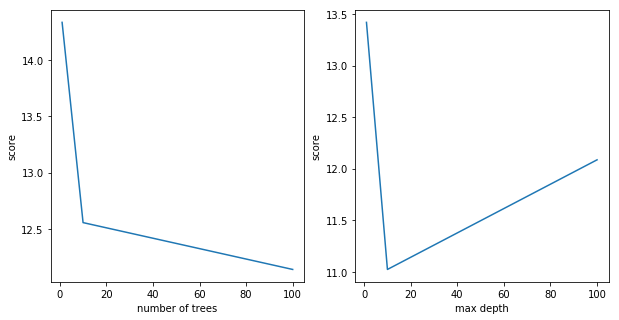

In [333]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n, scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')

plt.subplot(122)
plt.plot(range_m, scores_m)
plt.ylabel('score')
plt.xlabel('max depth')

##### Построение окончательной модели


In [344]:
# Будем использовать параметры, которые мы получили для окончательной модели
model = RandomForestClassifier(n_estimators=best_n, max_depth=best_m)
model.fit(train, train_y)
pred = model.predict_proba(submission)

#### Получение результатов

In [ ]:
# Предсказаные shot_made_flag записываются в файл 'real_submission.csv'.

In [345]:
sub = pd.read_csv("sample_submission.csv")
sub['shot_made_flag'] = pred
sub.to_csv("real_submission.csv", index=False)

In [346]:
# прочитаем первичный файл с kaggle, где все вероятности равны 0,5
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df.head()

,shot_id,shot_made_flag
0,1,0.5
1,8,0.5
2,17,0.5
3,20,0.5
4,33,0.5


In [347]:
# посмотрим на наш файл с предсказаниями
real_submission_df = pd.read_csv('real_submission.csv')
real_submission_df.head()

,shot_id,shot_made_flag
0,1,0.603186
1,8,0.574257
2,17,0.404897
3,20,0.399121
4,33,0.622476


In [349]:
real_submission_df.head()

,shot_id,shot_made_flag
0,1,0.603186
1,8,0.574257
2,17,0.404897
3,20,0.399121
4,33,0.622476


In [350]:
real_submission_df.describe()

,shot_id,shot_made_flag
count,5000.00000,5000.000000
mean,15456.06940,0.548565
std,8867.58899,0.162197
min,1.00000,0.052110
25%,7800.50000,0.433638
50%,15414.00000,0.629992
75%,23210.25000,0.656620
max,30694.00000,0.963749


### Считаем RSS

In [376]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# обучим нашу регрессию по метрикам, отражающим расстояния броска, и зафитим ее
est = smf.ols('shot_made_flag ~ shot_zone_area + shot_zone_basic + shot_zone_range', data=data2).fit()

est_res = est.summary()
est_res.tables[1]
# p-value равен нулю, это значит, что гипотезу о том, что эти метрики не влияют на результат броска, можно отбросить

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3447,0.017,20.107,0.000,0.311,0.378
shot_zone_area,0.0041,0.001,5.015,0.000,0.002,0.006
shot_zone_basic,0.0022,0.000,14.136,0.000,0.002,0.002
shot_zone_range,-0.0043,0.000,-10.090,0.000,-0.005,-0.003


In [377]:
est.conf_int(alpha=0.1)

,0,1
Intercept,0.316456,0.372847
shot_zone_area,0.002734,0.005404
shot_zone_basic,0.001936,0.002446
shot_zone_range,-0.004968,-0.003575


In [378]:
est_res

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         shot_made_flag   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     360.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          2.62e-229
Time:                        15:21:54   Log-Likelihood:                -17971.
No. Observations:               25697   AIC:                         3.595e+04
Df Residuals:                   25693   BIC:                         3.598e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3447      0.017     20.107      0.000       0.311       0.378
shot_zone_area      0.0041      0.001      5.015      0.000       0.002       0.006
shot_zone_basic     0.0022      0.000     14.136      0.000       0.002       0.002
shot_zone_range    -0.0043      0.000    -10.090      0.000      -0.005      -0.003
==============================================================================
Omnibus:                      196.659   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3618.660
Skew:                           0.217   Prob(JB):                         0.00
Kurtosis:                       1.213   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""